### Import Libarary

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
titanic = pd.read_csv('./data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 결측치 처리
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.Cabin.fillna('UNK', inplace=True)
titanic.Embarked.fillna('UNK', inplace=True)
titanic.Cabin = titanic.Cabin.str[:1]
titanic = titanic.drop(columns=['PassengerId','Name','Ticket'])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
# 범주형 데이터 처리
from sklearn.preprocessing import LabelEncoder

for col in ['Sex','Cabin','Embarked'] :
    le=LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


In [9]:
y = titanic.Survived
X = titanic.drop(columns='Survived')
np.random.seed(2022)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(max_iter=200) # Default 100
clf_log.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [11]:
clf_log.coef_

array([[-8.49127174e-01, -2.49953619e+00, -4.63045338e-02,
        -3.61154652e-01,  1.08466213e-02,  1.09890740e-03,
        -1.19997107e-01, -7.83906640e-02]])

In [14]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [15]:
pd.DataFrame({'변수명':X.columns, '계수값':clf_log.coef_[0]})

,변수명,계수값
0,Pclass,-0.849127
1,Sex,-2.499536
2,Age,-0.046305
3,SibSp,-0.361155
4,Parch,0.010847
5,Fare,0.001099
6,Cabin,-0.119997
7,Embarked,-0.078391


In [19]:
pred_log = clf_log.predict(X_test)
pred_log

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_log)

0.7910447761194029

In [18]:
from sklearn.metrics import roc_auc_score
pred_log2 = clf_log.predict_proba(X_test)[:,1]
pred_log2 # 첫 번째 열값만 필요해서 추출 (1일 때의 확률값)
roc_auc_score(y_test, pred_log2) # roc_auc는 확률값을 받음

0.8634226190476191

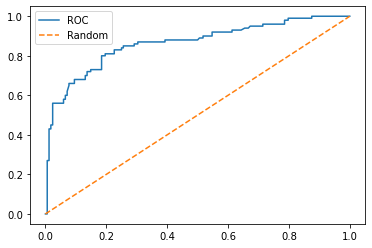

In [40]:
from sklearn.metrics import roc_curve

fprs, tprs, threshold = roc_curve(y_test, pred_log2)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1],'--',label='Random')
plt.legend()
plt.show();

In [24]:
# Cross Validation
from sklearn.model_selection import cross_val_score

clf_log = LogisticRegression(max_iter=200)
scores = cross_val_score(clf_log, X, y, scoring='roc_auc', cv=5)
print(scores)
print('Mean: ',np.mean(scores))

[0.85006588 0.83175134 0.8546123  0.84485294 0.8744183 ]
Mean:  0.8511401498264751


#### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score
pred_dt01 = dt.predict(X_test)
pred_dt02 = dt.predict_proba(X_test)[:,1]
print(accuracy_score(y_test, pred_dt01))
print(roc_auc_score(y_test, pred_dt02))

0.7611940298507462
0.7397916666666666


In [31]:
dt.feature_importances_

array([0.09567084, 0.28828364, 0.24249701, 0.05578831, 0.02832209,
       0.2125978 , 0.05761873, 0.01922158])

In [35]:
fe = pd.DataFrame({'열이름':X.columns, '변수중요도':dt.feature_importances_}).sort_values('변수중요도',ascending=False)
fe

,열이름,변수중요도
1,Sex,0.288284
2,Age,0.242497
5,Fare,0.212598
0,Pclass,0.095671
6,Cabin,0.057619
3,SibSp,0.055788
4,Parch,0.028322
7,Embarked,0.019222


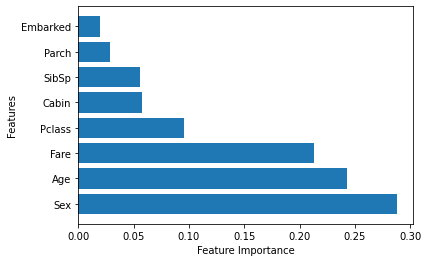

In [39]:
plt.barh(fe.열이름, fe.변수중요도, align='center');
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [45]:
results_tr = []
results_te = []

for m in range(1,20) :
    dt = DecisionTreeClassifier(max_depth=m)
    dt.fit(X_train, y_train)
    pred_tr = dt.predict_proba(X_train)[:,1]
    pred_te = dt.predict_proba(X_test)[:,1]
    results_tr.append(roc_auc_score(y_train, pred_tr))
    results_te.append(roc_auc_score(y_test, pred_te))

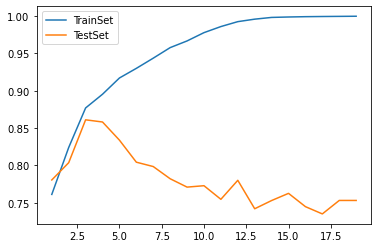

In [46]:
# Underfitting n Overfitting
plt.plot(range(1,20),results_tr, label='TrainSet')
plt.plot(range(1,20),results_te, label='TestSet')
plt.legend();

In [47]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

pred_dt01 = dt.predict(X_test)
pred_dt02 = dt.predict_proba(X_test)
print(accuracy_score(y_test, pred_dt01))
print(roc_auc_score(y_test, pred_dt01))

0.8283582089552238
0.8064285714285715
